In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import matplotlib.dates as mdates
import datetime as dt
import numpy as np

In [27]:
csv_path = "unemployment.csv"
ue_df = pd.read_csv(csv_path)
ue_df.set_index('State', inplace=True)
ue_df.dropna(how='all', inplace=True)

ue_df = ue_df.unstack().to_frame().reset_index().rename(columns={"level_0": "year", 0: "rate"})
top_year = ue_df.groupby("year").rate.nlargest(5).to_frame()
top_year = top_year.reset_index(level=1)\
                            .merge(ue_df, how='left', left_on="level_1", right_index=True)\
                             .drop(["level_1", "rate_y"], axis=1)
top_year.head()

,rate_x,year,State
year,,,
1995,8.8,1995,District of Columbia
1995,7.9,1995,CA
1995,7.9,1995,WV
1995,7.3,1995,AK
1995,7.0,1995,LA


In [30]:
ue_df.head()

,year,State,rate
0,1995,AL,6.0
1,1995,AK,7.3
2,1995,AZ,5.3
3,1995,AR,4.8
4,1995,CA,7.9


In [155]:
fig.set_visible()

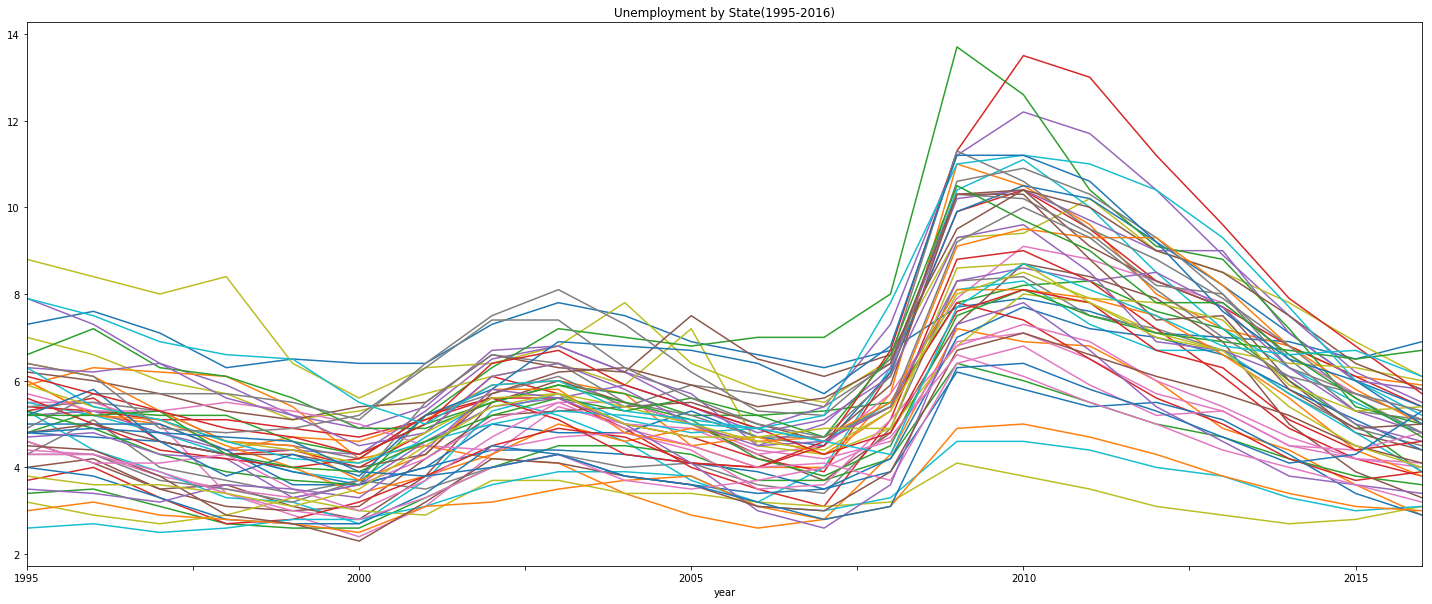

In [198]:
count = 0

fig, ax = plt.subplots(1)

for index, group in ue_df.groupby("State"):
    group.plot("year", "rate", ax=ax, label=index, figsize=(25, 10), fontsize ="medium", title = "Unemployment by State(1995-2016)" )
    #print(type(group))
    count += 1
#     if count > 10:
#         break

ax.legend_.remove()
plt.show()

In [144]:
for i in ax.get_xticklabels():
    print(i)

Text(0,0,'1995')
Text(2.5,0,'')
Text(5,0,'2000')
Text(7.5,0,'')
Text(10,0,'2005')
Text(12.5,0,'')
Text(15,0,'2010')
Text(17.5,0,'')
Text(20,0,'2015')
Text(0,0,'')


In [180]:
only_AL = ue_df.loc[ue_df["State"]=="AL" ,:]

In [195]:
crime_path = "crimes.csv"
crime = pd.read_csv(crime_path)
crime.set_index('State', inplace=True)
crime.dropna(how='all', inplace=True)
crime = crime.unstack().to_frame().reset_index().rename(columns={"level_0": "year", 0: "crime rate"})
crime.head()

,year,State,crime rate
0,1995,AK,155.132450
1,1995,AL,185.751234
2,1995,AR,125.684380
3,1995,AZ,173.755334
4,1995,CA,331.162747


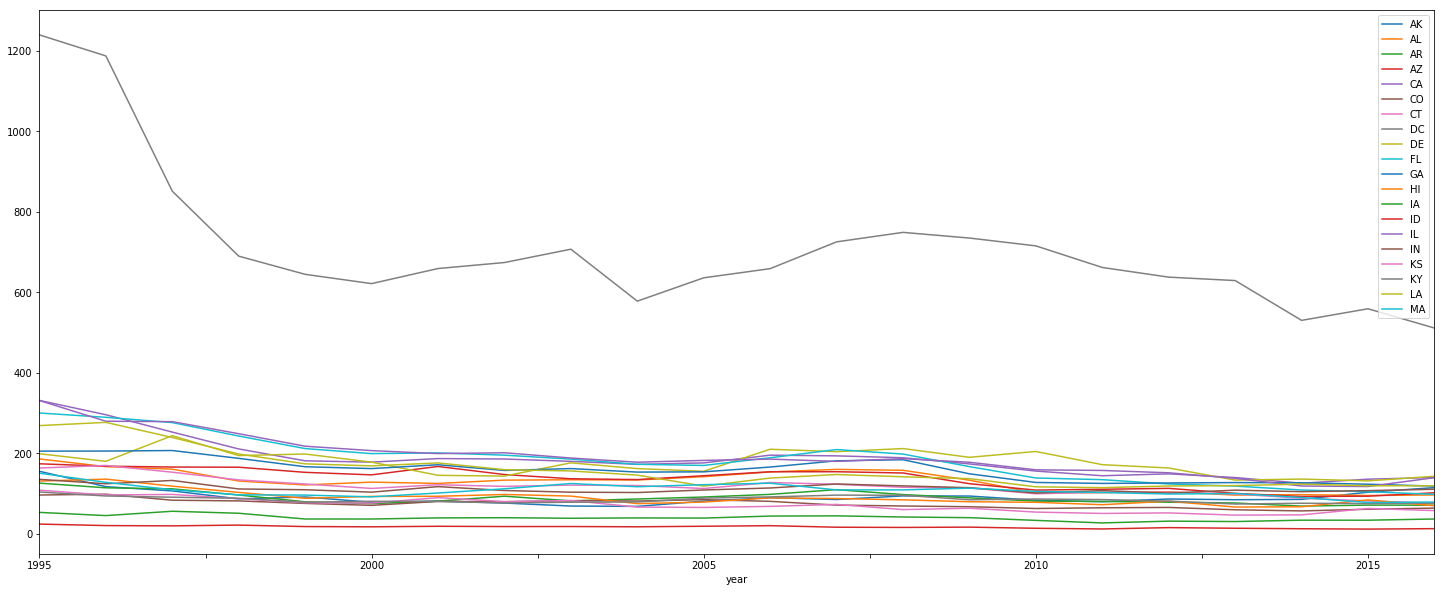

In [205]:
count = 1
fig, ax = plt.subplots(1)
for index, group in crime.groupby("State"):
    group.plot("year", "crime rate", ax=ax, label = index, figsize = (25, 10))
    count += 1
    if count > 20:
         break

#ax.legend_.remove()
plt.show()